In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('train.csv')
df['date']=pd.to_datetime(dict(year=df.year,month=df.month,day=df.day))
date=df.pop('date')
df.insert(0,'date',date)
df.head()

,date,year,month,day,latitude,longitude,zon.winds,mer.winds,humidity,air temp.,s.s.temp.
0,1992-12-13,1992,12,13,-4.99,156.0,4.8,-2.8,78.5,28.98,30.06
1,1989-05-14,1989,5,14,0.00,-110.1,-2.5,2.4,NaN,24.95,25.23
2,1993-06-28,1993,6,28,2.04,-110.2,-4.5,5.9,NaN,25.78,27.84
3,1995-01-08,1995,1,8,1.98,-140.0,-7.7,1.2,82.6,26.47,26.86
4,1995-02-21,1995,2,21,5.01,-170.0,-5.4,-6.6,75.2,28.83,28.90


In [3]:
df.sort_values(['date'],inplace=True)
df.reset_index(inplace=True,drop=True)
#df.set_index('date',inplace=T)
df.dropna(subset=['air temp.'],inplace=True)
df['zon.winds'].fillna(np.random.normal(-3.505847,3.222261),inplace=True)
df['mer.winds'].fillna(np.random.normal(0.451069,2.927329),inplace=True)
df['humidity'].fillna(np.random.normal(81.267260,5.363381),inplace=True)

x=df.iloc[:,1:-1]
# months=pd.get_dummies(x.month)
# x=pd.concat([x,months],axis=1)
# x.columns=x.columns.astype(str)
y=df.iloc[:,-1]
x.head()

,year,month,day,latitude,longitude,zon.winds,mer.winds,humidity,air temp.
0,1980,3,8,-0.02,-109.44,-4.9,1.1,89.246526,25.66
1,1980,3,9,-0.02,-109.44,-4.5,2.2,89.246526,25.69
2,1980,3,10,-0.02,-109.44,-3.8,1.9,89.246526,25.56
3,1980,3,12,-0.02,-109.44,-4.4,0.3,89.246526,24.72
4,1980,3,13,-0.02,-109.44,-3.2,0.1,89.246526,24.66


In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error,root_mean_squared_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,KBinsDiscretizer, PolynomialFeatures, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [5]:
tss=TimeSeriesSplit(n_splits=3)
for train,test in tss.split(x):
    x_train,x_test=x.iloc[train,:],x.iloc[test,:]
    y_train,y_test=y.iloc[train],y.iloc[test]

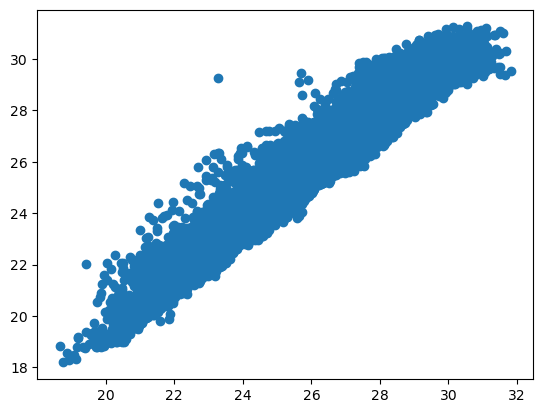

In [6]:
mod=Pipeline([('scale',StandardScaler()),
              ('model',LinearRegression())])
mod=GridSearchCV(estimator=mod,
                 param_grid={},
                 cv=3)
mod.fit(X=x_train,y=y_train)
pred=mod.predict(x_test)
plt.scatter(pred,y_test)

In [7]:
mean_absolute_error(y_test,pred)

0.44531560460467645

In [8]:
root_mean_squared_error(y_test,pred)

0.5767381276659723

In [9]:
r2_score(y_test,pred)

0.9381537271264277

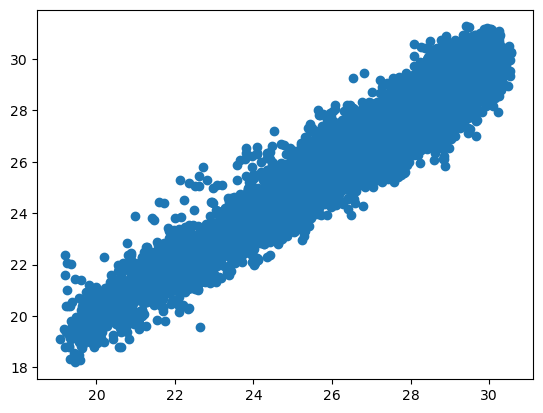

In [10]:
mod=Pipeline([('scale',StandardScaler()),
              ('model',KNeighborsRegressor())])
mod=GridSearchCV(estimator=mod,
                 param_grid={},
                 cv=3)
mod.fit(X=x_train,y=y_train)
pred=mod.predict(x_test)
plt.scatter(pred,y_test)

In [11]:
mean_absolute_error(y_test,pred)

0.47775776654792473

In [12]:
root_mean_squared_error(y_test,pred)

0.6136182549193561

In [13]:
r2_score(y_test,pred)

0.9299911815031061

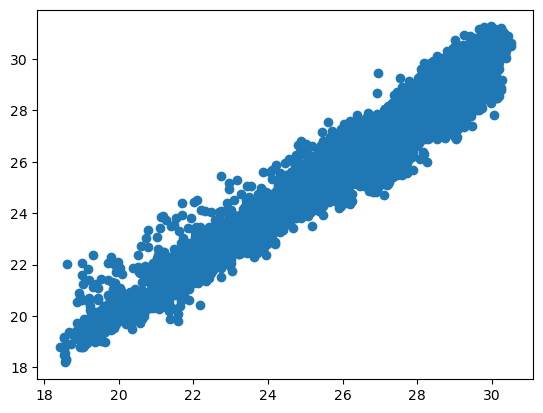

In [14]:
mod=Pipeline([('scale',StandardScaler()),
              ('model',RandomForestRegressor())])
mod=GridSearchCV(estimator=mod,
                 param_grid={},
                 cv=3)
mod.fit(X=x_train,y=y_train)
pred=mod.predict(x_test)
plt.scatter(pred,y_test)

In [15]:
mean_absolute_error(y_test,pred)

0.3985230055504932

In [16]:
root_mean_squared_error(y_test,pred)

0.5178943667660356

In [17]:
r2_score(y_test,pred)

0.95013009049275

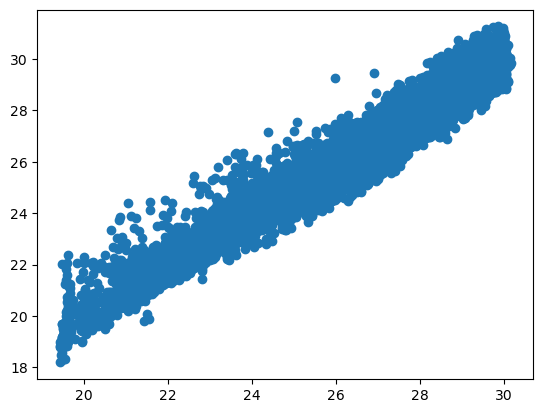

In [18]:
mod=Pipeline([('scale',StandardScaler()),
              ('model',GradientBoostingRegressor())])
mod=GridSearchCV(estimator=mod,
                 param_grid={},
                 cv=3)
mod.fit(X=x_train,y=y_train)
pred=mod.predict(x_test)
plt.scatter(pred,y_test)

In [19]:
mean_absolute_error(y_test,pred)

0.3949280259912965

In [20]:
root_mean_squared_error(y_test,pred)

0.503761883331454

In [21]:
r2_score(y_test,pred)

0.9528146898825715